In [1]:
import sys
sys.path.append("/home/hugo/projetos-doutorado/mimo_emb_fts/src/")
#sys.path.insert(0, '/home/hugo/projetos-doutorado/imp_doutorado/src/evolving_soda') 
import pandas as pd
import matplotlib.pyplot as plt
from embfts.models.NonStationaryFtsPca import NonStationaryFtsPca
from pyFTS.benchmarks import Measures
from pyFTS.models.nonstationary import nsfts
import math
import datetime
import statistics
import numpy as np
from pyFTS.common import Util
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

from embfts.util.DataSetUtil import DataSetUtil
from embfts.util.StatisticsUtil import StatisticsUtil


np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

### Dataset Energy Appliance

In [2]:
data_set_util = DataSetUtil()
statistics = StatisticsUtil()

In [3]:
df = pd.read_csv('/home/hugo/projetos-doutorado/mimo_emb_fts/data/energydata_complete.csv', sep=',')
data = df.drop(labels=['date','rv1','rv2'], axis=1)
data = data_set_util.clean_dataset(data)
data = data_set_util.series_to_supervised_miso(data, 1, 1, 'Appliances')
data.head()

,Appliances(t-1),lights(t-1),T1(t-1),RH_1(t-1),T2(t-1),RH_2(t-1),T3(t-1),RH_3(t-1),T4(t-1),RH_4(t-1),...,RH_8(t-1),T9(t-1),RH_9(t-1),T_out(t-1),Press_mm_hg(t-1),RH_out(t-1),Windspeed(t-1),Visibility(t-1),Tdewpoint(t-1),Appliances(t)
1,60.0,30.0,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,60.0
2,60.0,30.0,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,50.0
3,50.0,30.0,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,50.0
4,50.0,40.0,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,60.0
5,60.0,40.0,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,50.0


### Model: NonStationaryFtsPca - PCA-NSFTS

In [4]:
fts_pca = NonStationaryFtsPca(num_components_pca = 1,
                          fts_model = nsfts.NonStationaryFTS,
                          order_fts_model = 1,
                          npart = 5,
                          gamma = 0.001,
                          memory_window_error = 3)



### Sliding Window PyFTS: PCA-NSFTS

--------------------
training window 0


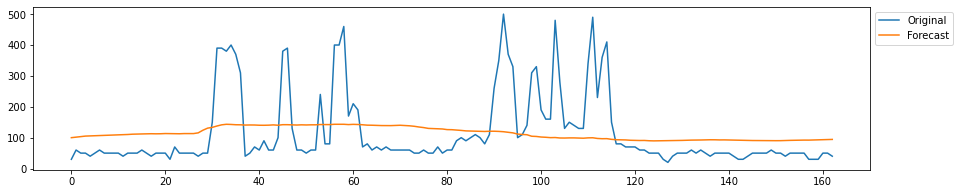

--------------------
training window 657


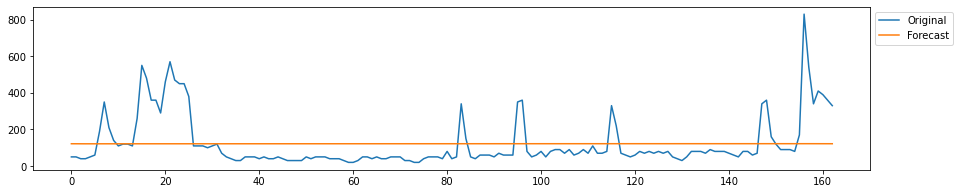

--------------------
training window 1314


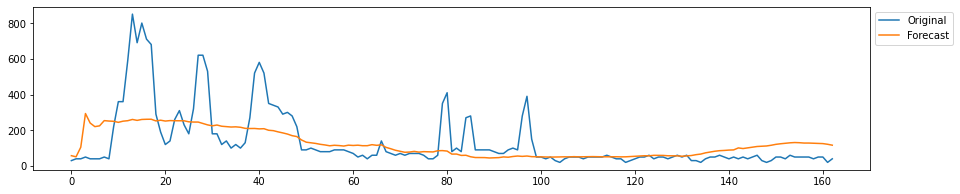

--------------------
training window 1971


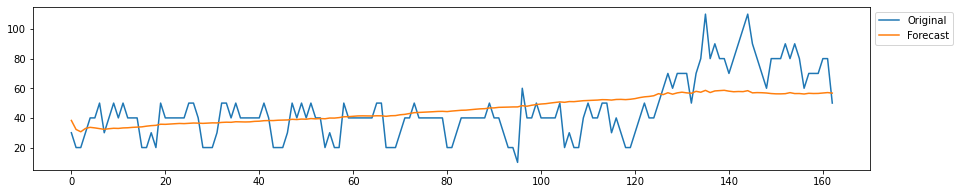

--------------------
training window 2628


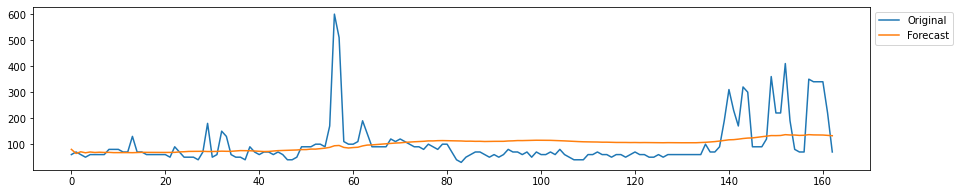

--------------------
training window 3285


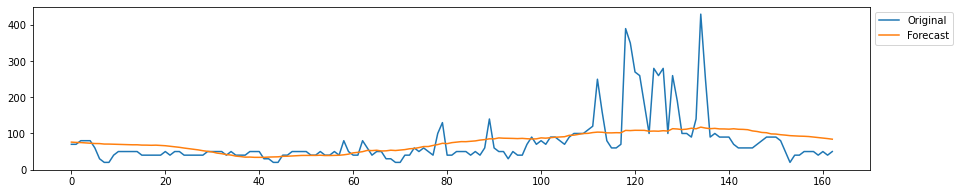

--------------------
training window 3942


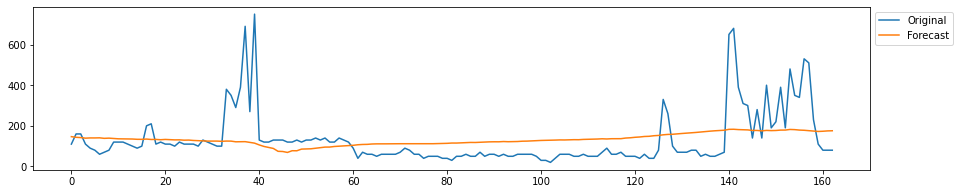

--------------------
training window 4599


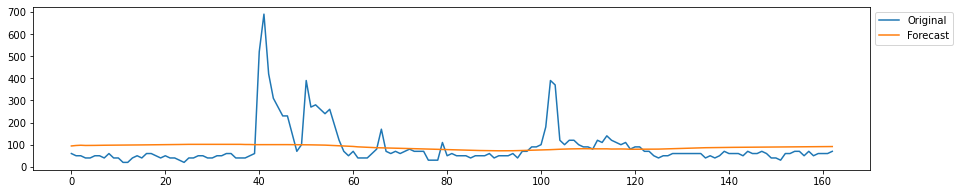

--------------------
training window 5256


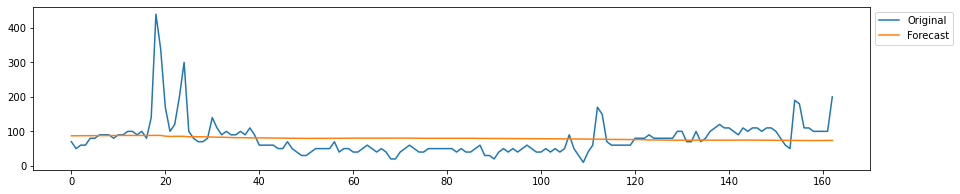

--------------------
training window 5913


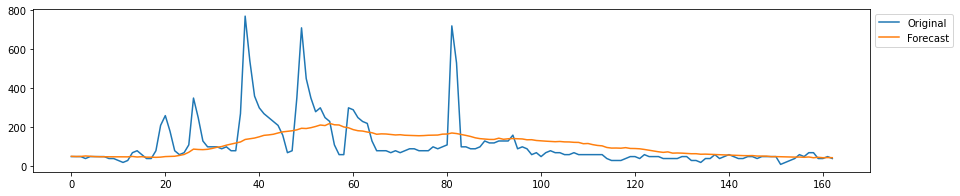

--------------------
training window 6570


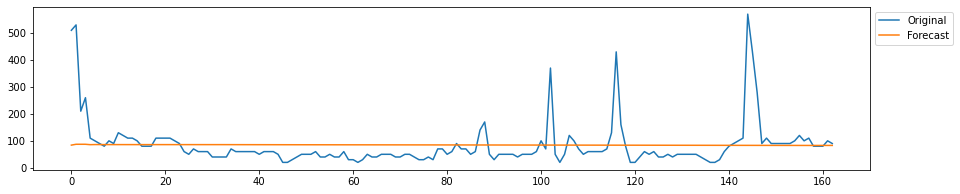

--------------------
training window 7227


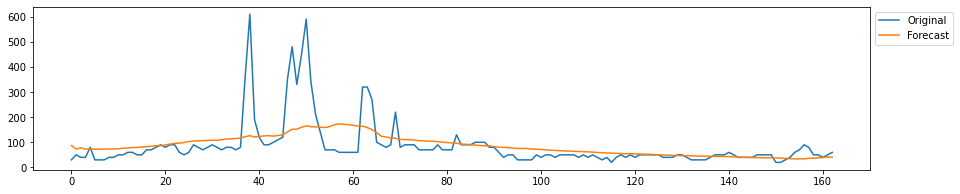

--------------------
training window 7884


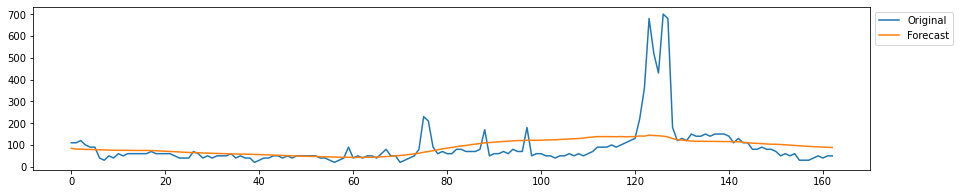

--------------------
training window 8541


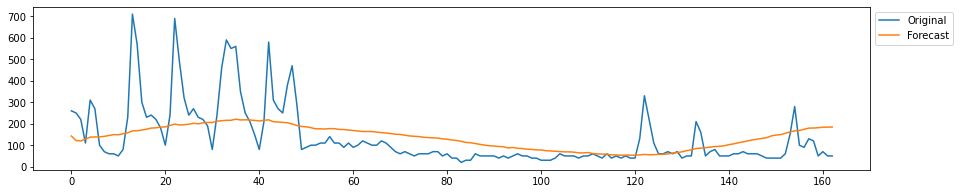

--------------------
training window 9198


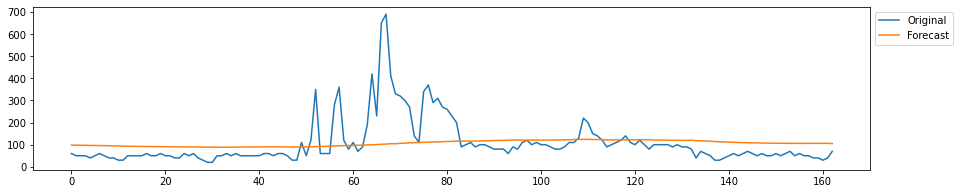

--------------------
training window 9855


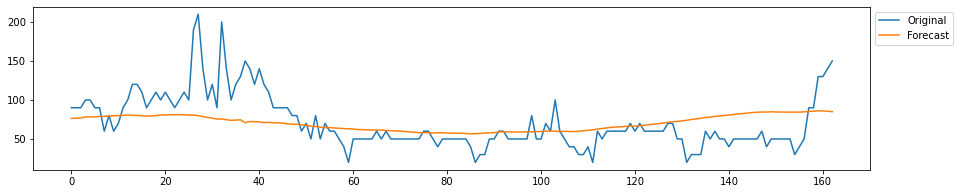

--------------------
training window 10512


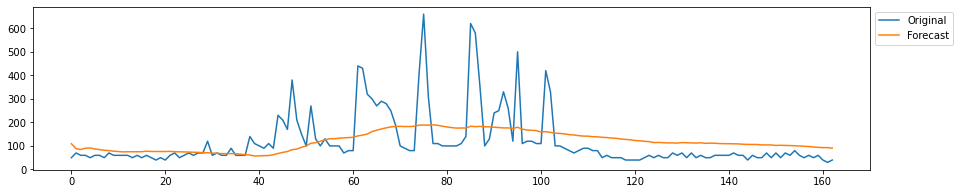

--------------------
training window 11169


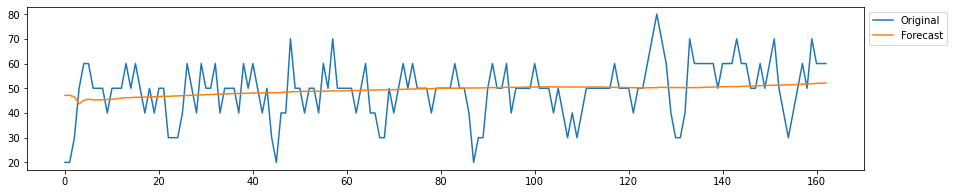

--------------------
training window 11826


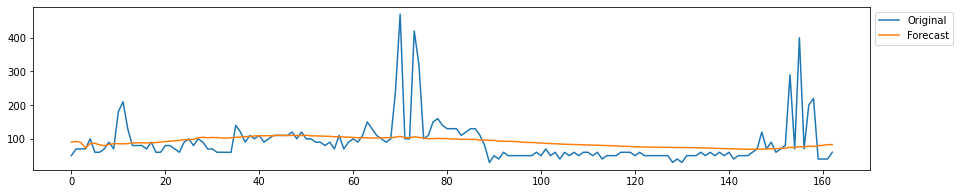

--------------------
training window 12483


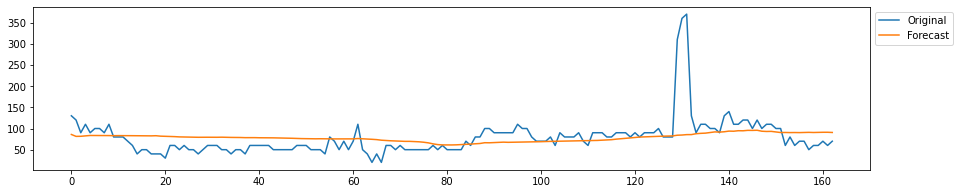

--------------------
training window 13140


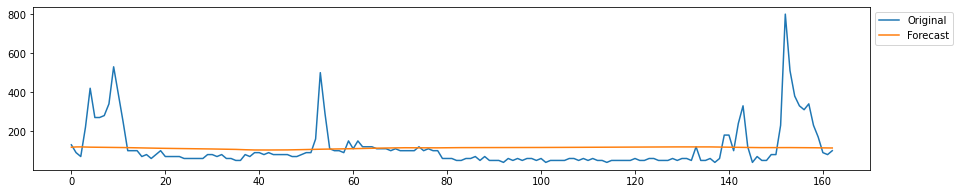

--------------------
training window 13797


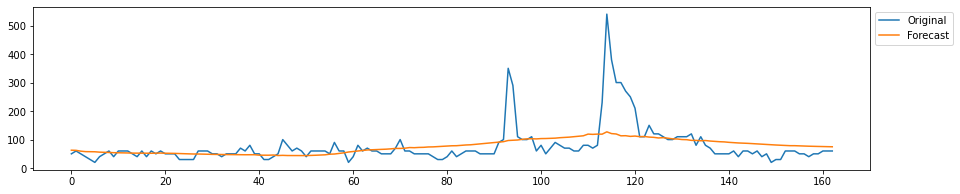

--------------------
training window 14454


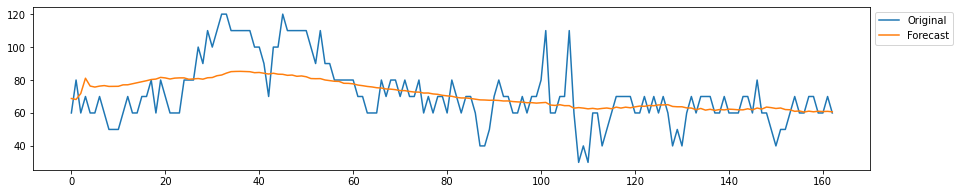

--------------------
training window 15111


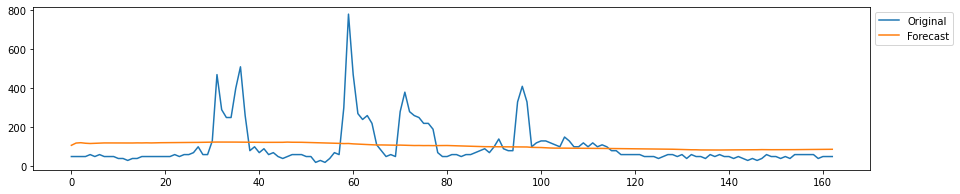

--------------------
training window 15768


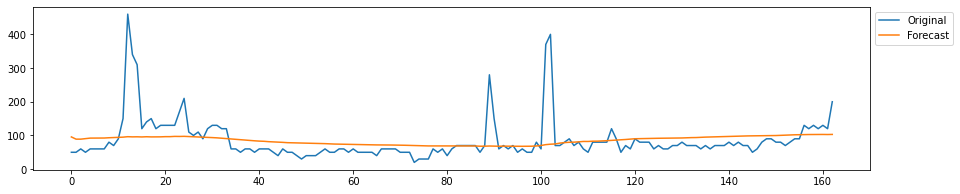

--------------------
training window 16425


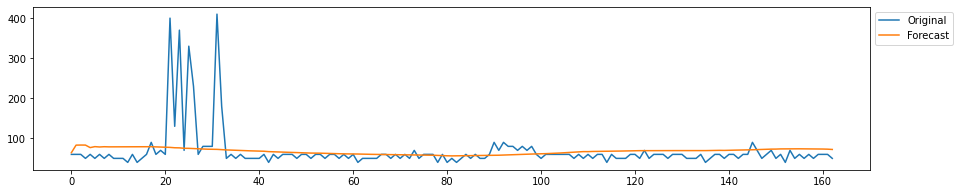

--------------------
training window 17082


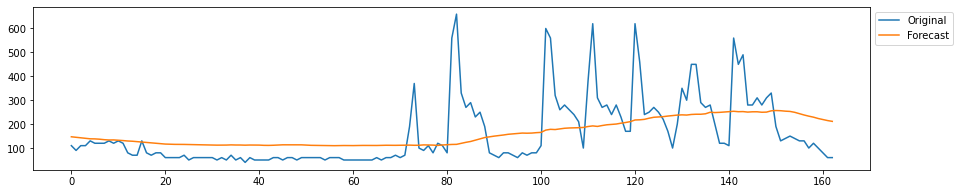

--------------------
training window 17739


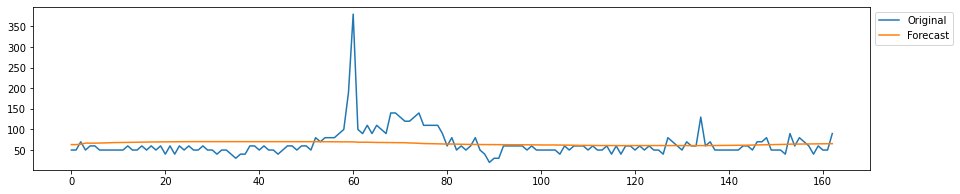

--------------------
training window 18396


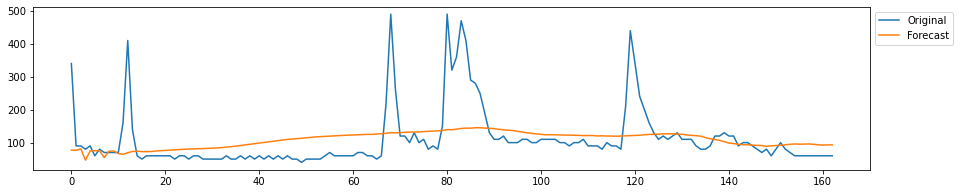

--------------------
training window 19053


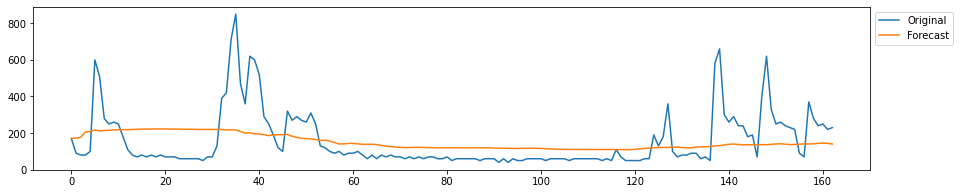

In [5]:
final_result,results = statistics.sliding_windows_miso_ensfts(data = data, n_windows = 30, train_size = 0.75, model = fts_pca, 
                                                              transformation = 'PCA', first_col_train = 'Appliances(t-1)', 
                                                              last_col_train = 'Tdewpoint(t-1)', target_col_train = 'Appliances(t-1)',
                                                              target_col_test = 'Appliances(t)', plot_graph = True, steps_ahead = 1)


#### Sliding Windows Statistics: 

In [6]:
print("Sliding Windows Statistics (test): ")
results

Sliding Windows Statistics (test): 


,rmse,mape,smape,mae,r2,nrmse
0,114.381436,95.284340,34.251628,84.058742,0.057321,0.238295
1,137.962512,119.159476,37.218813,96.792836,0.000074,0.170324
2,139.554567,83.938530,28.023995,85.320706,0.323018,0.168138
3,16.416063,36.523447,14.606181,12.875438,0.349847,0.164161
4,82.563895,52.475695,21.530700,49.927170,0.101019,0.144849
5,57.995211,47.433264,18.885725,33.278388,0.269339,0.141452
6,126.508467,90.395798,30.621204,85.302248,0.090244,0.173299
7,91.978909,72.696833,26.926788,54.932972,0.020378,0.137282
8,51.881713,54.097467,20.334052,33.255426,0.016314,0.120655
9,111.425517,60.846229,23.669459,63.095640,0.235587,0.146613


#### Mean Statistics PCA-NSFTS:

In [7]:
print("Mean Statistics PCA-NSFTS (test): ")
final_result

Mean Statistics PCA-NSFTS (test): 


,rmse,mape,smape,mae,r2,nrmse
0,81.577334,58.565694,22.147238,51.027698,0.135109,0.154359


### Sliding Window PyFTS: KPCA-NSFTS

In [8]:
final_result_kpca,results_kpcs = statistics.sliding_windows_miso_ensfts(data = data, n_windows = 30, train_size = 0.75, model = fts_pca, 
                                                              transformation = 'KPCA', first_col_train = 'Appliances(t-1)', 
                                                              last_col_train = 'Tdewpoint(t-1)', target_col_train = 'Appliances(t-1)',
                                                              target_col_test = 'Appliances(t)', plot_graph = True, steps_ahead = 1)


--------------------
training window 0


NotFittedError: The fit_inverse_transform parameter was not set to True when instantiating and hence the inverse transform is not available.

#### Sliding Windows Statistics: 

In [ ]:
print("Sliding Windows Statistics: ")
results_kpcs

#### Mean Statistics KPCA-NSFTS:

In [ ]:
print("Mean Statistics KPCA-NSFTS: ")
final_result_kpca